In [38]:
import pandas as pd
import numpy as np

In [39]:
train_data=pd.read_csv('final_train_data_StdSc.csv')
test_data=pd.read_csv('final_test_data_StdSc.csv')

In [40]:
train_data_all=train_data.drop(['msno','is_churn','Unnamed: 0'],axis=1)#this dataset shouldn't include msno and in_churn
train_target=train_data['is_churn']

In [41]:
test_target=test_data['is_churn']
test_data=test_data.drop(['msno','is_churn','Unnamed: 0'],axis=1)#this dataset shouldn't include msno and in_churn

In [42]:
ann_best=pd.read_csv("proba_ANN.csv")

In [43]:
ann_best.head()

,Unnamed: 0,0
0,0,0.091336
1,1,0.026046
2,2,0.001348
3,3,0.013919
4,4,0.114462


In [44]:
log_best=pd.read_csv("proba_log.csv",header=None,delim_whitespace=True)

In [45]:
log_best.head()

,0,1
0,0.890324,0.109676
1,0.952818,0.047182
2,0.969541,0.030459
3,0.989253,0.010747
4,0.923956,0.076044


In [46]:
naive_best=pd.read_csv("proba_naivebayes.csv",header=None,delim_whitespace=True)

In [47]:
naive_best.head()

,0,1
0,0.974323,0.025677
1,0.966726,0.033274
2,0.982284,0.017716
3,0.984759,0.015241
4,0.976299,0.023701


In [48]:
tree_best_ori=np.loadtxt("proba_DT.csv")

In [49]:
tree_best=pd.DataFrame(tree_best_ori)

In [50]:
tree_best.head()

,0,1
0,0.992401,0.007599
1,0.926531,0.073469
2,0.999460,0.000540
3,0.992578,0.007422
4,0.926531,0.073469


In [51]:
knn_best=pd.read_csv("proba_KNN.csv",header=None,delim_whitespace=True)

In [52]:
knn_best.head()

,0,1
0,0.777778,0.222222
1,1.000000,0.000000
2,1.000000,0.000000
3,1.000000,0.000000
4,0.666667,0.333333


In [53]:
#knn.shape

In [54]:
svm_best=pd.read_csv("proba_SVM.csv",header=None,delim_whitespace=True)

In [55]:
svm_best.head()

,0,1
0,0.956109,0.043891
1,0.965520,0.034480
2,0.957199,0.042801
3,0.956260,0.043740
4,0.957576,0.042424


In [56]:
#All Together
ann=ann_best['0']
log=log_best.iloc[:,1]
nai=naive_best.iloc[:,1]
tre=tree_best.iloc[:,1]
knn=knn_best.iloc[:,1]
svm=svm_best.iloc[:,1]

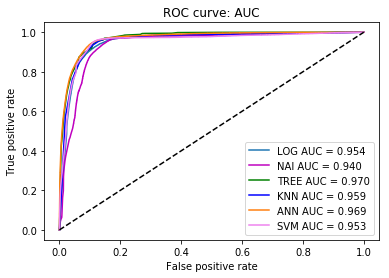

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#ann
ann_fpr_rf, ann_tpr_rf, _ = roc_curve(test_target,ann)
ann_auc_score=roc_auc_score(test_target, ann)
#log
log_fpr_rf, log_tpr_rf, _ = roc_curve(test_target,log)
log_auc_score=roc_auc_score(test_target, log)
#naive
nai_fpr_rf, nai_tpr_rf, _ = roc_curve(test_target,nai)
nai_auc_score=roc_auc_score(test_target, nai)
#tree
tre_fpr_rf, tre_tpr_rf, _ = roc_curve(test_target,tre)
tre_auc_score=roc_auc_score(test_target, tre)
#knn
knn_fpr_rf, knn_tpr_rf, _ = roc_curve(test_target,knn)
knn_auc_score=roc_auc_score(test_target, knn)
#svm
svm_fpr_rf, svm_tpr_rf, _ = roc_curve(test_target,svm)
svm_auc_score=roc_auc_score(test_target, svm)

#colors = (["r", "g", "b","c","C0","m","fuchsia","y","violet","C1"]) #make sure that this equal to your number of models
plt.plot(log_fpr_rf, log_tpr_rf, label = 'LOG'+' '+'AUC = %0.3f' % log_auc_score,color='C0') # log
plt.plot(nai_fpr_rf, nai_tpr_rf, label = 'NAI'+' '+'AUC = %0.3f' % nai_auc_score,color='m') #naive
plt.plot(tre_fpr_rf, tre_tpr_rf, label = 'TREE'+' '+'AUC = %0.3f' % tre_auc_score,color='g')# tree
plt.plot(knn_fpr_rf, knn_tpr_rf, label = 'KNN'+' '+'AUC = %0.3f' % knn_auc_score,color='b')# knn
plt.plot(ann_fpr_rf, ann_tpr_rf, label = 'ANN'+' '+'AUC = %0.3f' % ann_auc_score,color='C1')# ANN
plt.plot(svm_fpr_rf, svm_tpr_rf, label = 'SVM'+' '+'AUC = %0.3f' % svm_auc_score,color='violet')# svm

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve: AUC')
plt.legend()
plt.show()


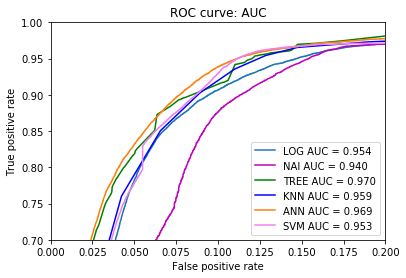

In [58]:
colors = (['b', 'g', 'r','c','m','y']) #make sure that this equal to your number of models
plt.plot(log_fpr_rf, log_tpr_rf, label = 'LOG'+' '+'AUC = %0.3f' % log_auc_score,color='C0') # log
plt.plot(nai_fpr_rf, nai_tpr_rf, label = 'NAI'+' '+'AUC = %0.3f' % nai_auc_score,color='m') #naive
plt.plot(tre_fpr_rf, tre_tpr_rf, label = 'TREE'+' '+'AUC = %0.3f' % tre_auc_score,color='g')# tree
plt.plot(knn_fpr_rf, knn_tpr_rf, label = 'KNN'+' '+'AUC = %0.3f' % knn_auc_score,color='b')# knn
plt.plot(ann_fpr_rf, ann_tpr_rf, label = 'ANN'+' '+'AUC = %0.3f' % ann_auc_score,color='C1')# ANN
plt.plot(svm_fpr_rf, svm_tpr_rf, label = 'SVM'+' '+'AUC = %0.3f' % svm_auc_score,color='violet')# svm

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim(0,0.2)
plt.ylim(0.7,1)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve: AUC')
plt.legend()
plt.show()